In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv("/content/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


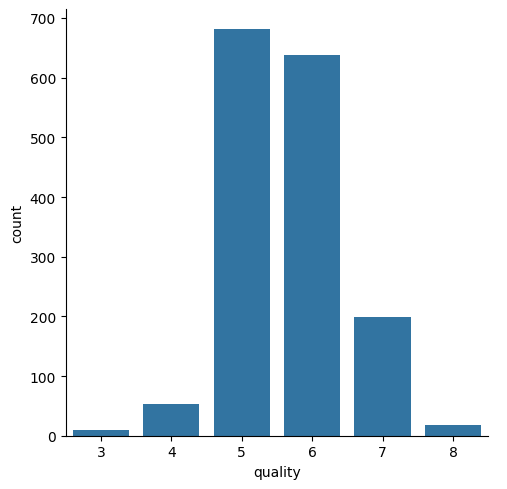

In [29]:
sns.catplot(x='quality', data=data, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

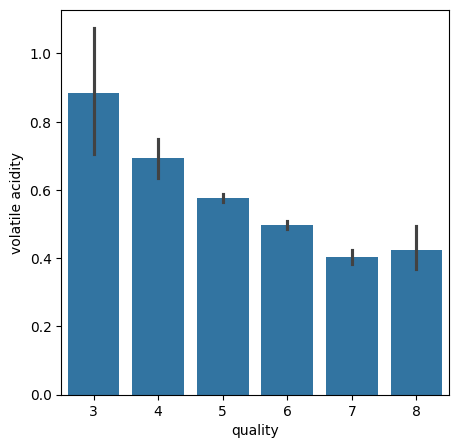

In [30]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

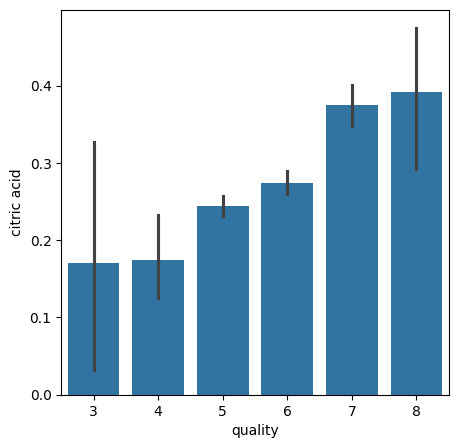

In [31]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'citric acid', data=data)

<Axes: xlabel='quality', ylabel='residual sugar'>

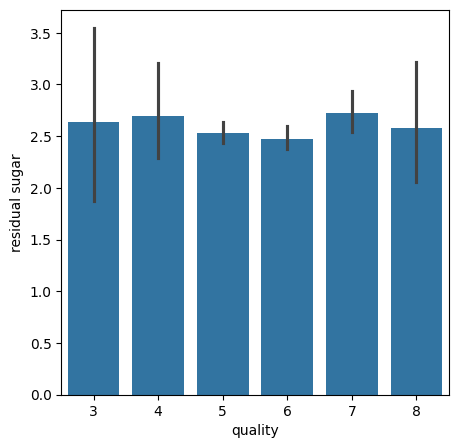

In [32]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'residual sugar', data=data)

<Axes: xlabel='quality', ylabel='chlorides'>

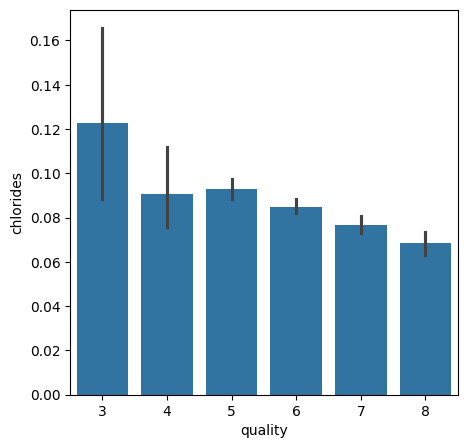

In [33]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'chlorides', data=data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

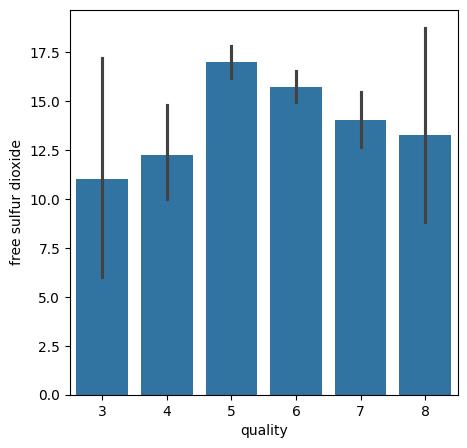

In [34]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'free sulfur dioxide', data=data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

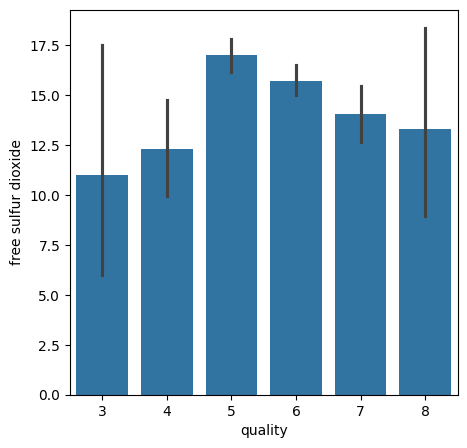

In [35]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'free sulfur dioxide', data=data)

<Axes: xlabel='quality', ylabel='density'>

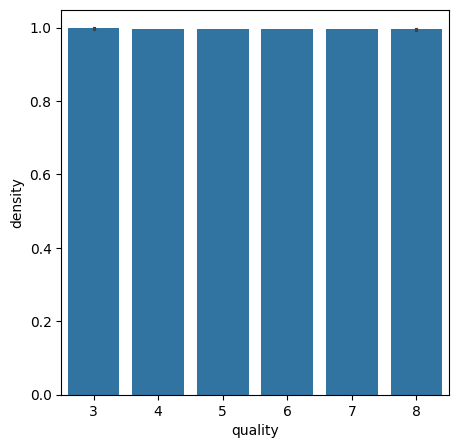

In [36]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'density', data=data)

<Axes: xlabel='quality', ylabel='pH'>

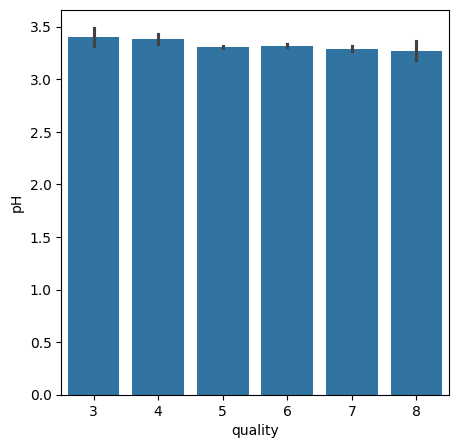

In [37]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'pH', data=data)

In [39]:
correlation = data.corr()

<Axes: >

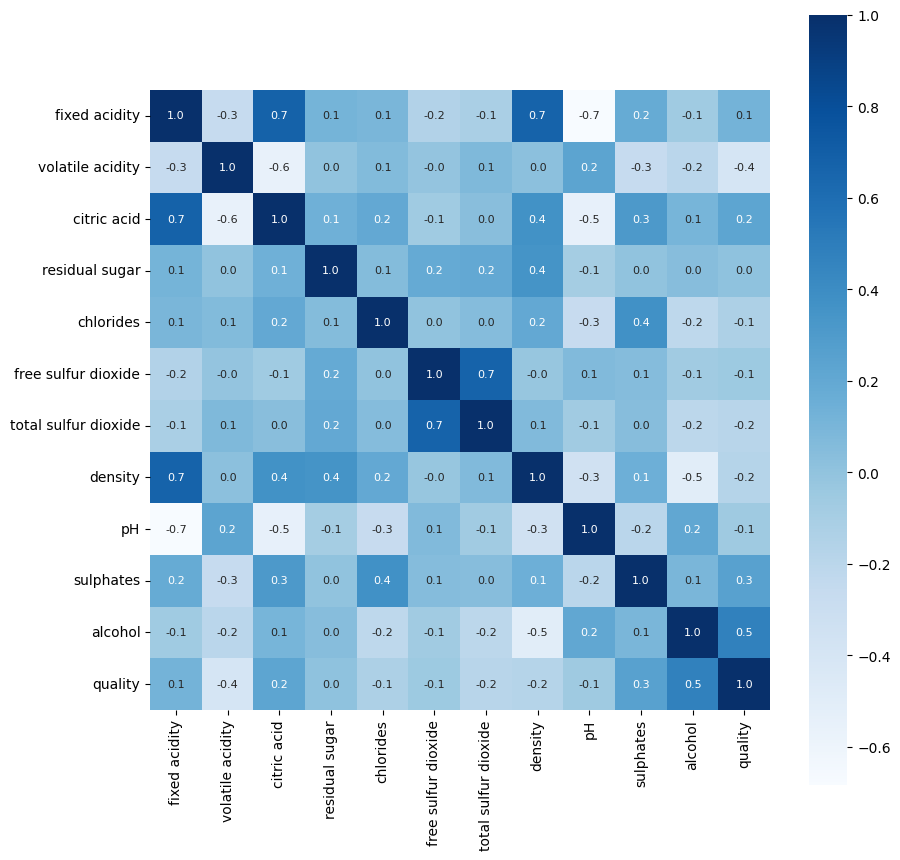

In [40]:
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 8},
            cmap='Blues')

In [41]:
x= data.drop('quality', axis=1)
y= data['quality']

In [42]:
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [43]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


Label binarisation/label encoding

In [44]:
y = data['quality'].apply(lambda y_value : 1 if y_value>=7 else 0)

In [45]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=42)

In [47]:
model = RandomForestClassifier()

In [48]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
x_test_prediction = model.predict(x_test)
accuracy = accuracy_score(x_test_prediction, y_test)

In [51]:
print("Accuracy:", accuracy )

Accuracy: 0.896875


In [59]:
# Building a predictive system
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
input_data_as_np_array = np.asarray(input_data)
input_data_reshape = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)
if(prediction==1):
  print("wine quality is good")
else:
  print("wine quality is bad")

[0]
wine quality is bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
